In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
 !wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-01-01 16:17:12--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-01-01 16:17:20 (16.3 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [5]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
img_height,img_width=30,30
batch_size=15
train_ds=tf.keras.utils.image_dataset_from_directory('/content/fruits/train',image_size=(img_height,img_width),batch_size=batch_size)
val_ds=tf.keras.utils.image_dataset_from_directory('/content/fruits/validation',image_size=(img_height,img_width),batch_size=batch_size)
test_ds=tf.keras.utils.image_dataset_from_directory('/content/fruits/test',image_size=(img_height,img_width),batch_size=batch_size)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


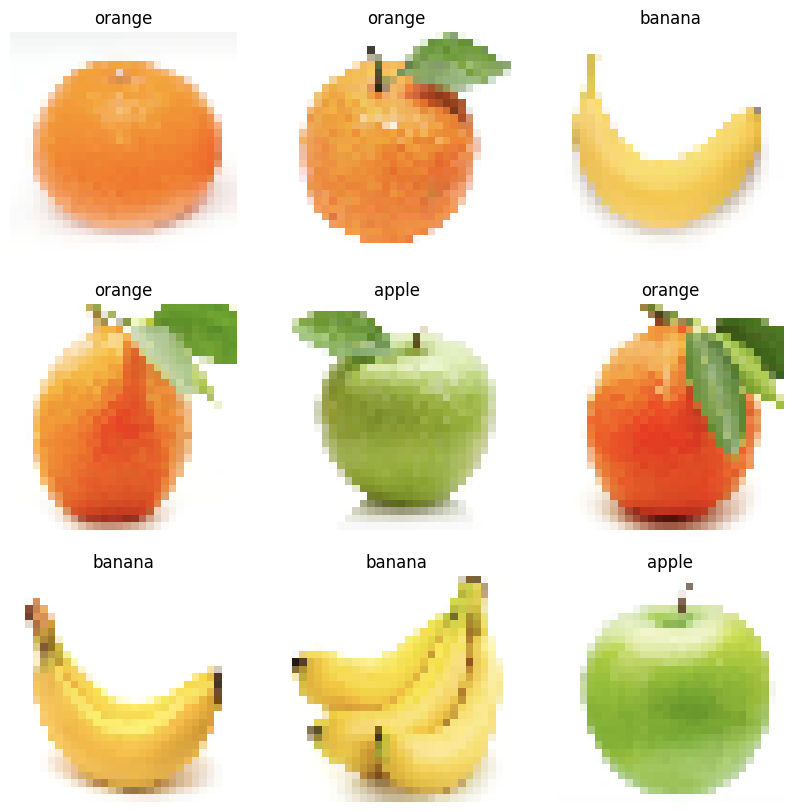

In [7]:
class_names=['apple','banana','orange']
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [8]:
model = tf.keras.Sequential(
 [
 tf.keras.layers.Rescaling(1./255),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(64, 3, activation="relu"),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Conv2D(128, 3, activation="relu"),
 tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation="softmax"),
 tf.keras.layers.Dense(3)
 ]
)

In [9]:
model.compile(
 optimizer="rmsprop",
 loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
 metrics=['accuracy']
)

In [10]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.3308 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.0864
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.3612 - loss: 1.0850 - val_accuracy: 0.5909 - val_loss: 1.0084
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5851 - loss: 1.0142 - val_accuracy: 0.4545 - val_loss: 0.9893
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5601 - loss: 0.9875 - val_accuracy: 0.6212 - val_loss: 0.9469
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5874 - loss: 0.9612 - val_accuracy: 0.5606 - val_loss: 0.9533
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6424 - loss: 0.9460 - val_accuracy: 0.7273 - val_loss: 0.9307
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6897 - loss: 0.9336 - val_accuracy: 0.5606 - val_loss: 0.9117
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6868 - loss: 0.9080 - val_accuracy: 0.7273 - 

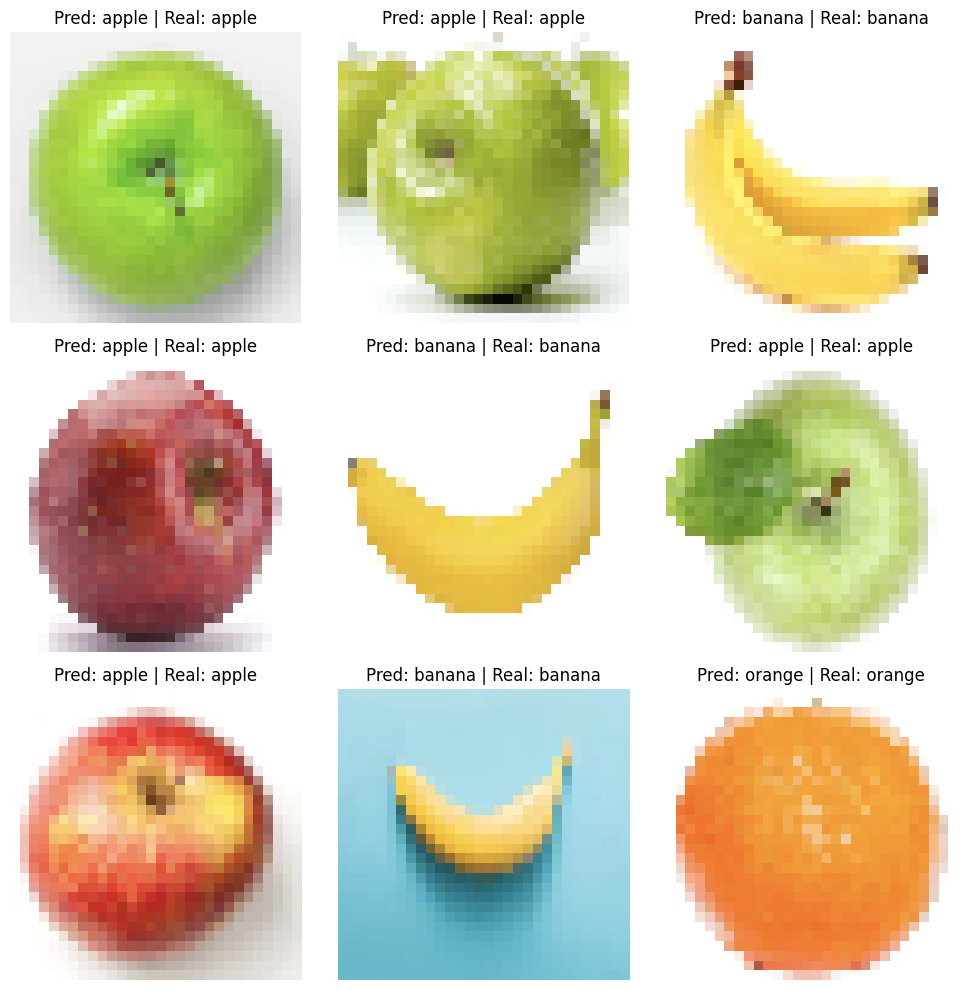

In [11]:
import numpy as np  # Corrected import for numpy
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Assuming test_ds is your test dataset and class_names is a list of class names
plt.figure(figsize=(10, 10))  # Set figure size

for images, labels in test_ds.take(1):  # Take one batch from the test dataset
    classifications = model(images)  # Get predictions from the model
    for i in range(9):  # Loop through the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
        index = np.argmax(classifications[i])  # Get the index of the predicted class
        plt.title(f"Pred: {class_names[index]} | Real: {class_names[labels[i]]}")  # Add title
        plt.axis("off")  # Hide axes for better display

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()  # Display the plot


In [ ]:
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
 classifications = model(images)
 # print(classifications)
 for i in range(9):
 ax = plt.subplot(3, 3, i + 1)
 plt.imshow(images[i].numpy().astype("uint8"))
 index = numpy.argmax(classifications[i])
 plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", 'wb') as f:
 f.write(tflite_model)

Saved artifact at '/tmp/tmppw22iozh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134557032930768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557033071008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557033081216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557033083504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557033086320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557032957728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557081319232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557032959488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134559830356944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134557032964944: TensorSpec(shape=(), dtype=tf.resource, name=None)
